In [1]:
%load_ext autoreload
%autoreload 2

import sys, os
sys.path.append('../')

from typing import List,Dict
from elmo_on_md.data_loaders.sentiment_loader import SentimentLoader
from elmo_on_md.evaluation.sentiment_analysis import SentimentAnalysis
from elmo_on_md.evaluation.model_loader import load_model
from ELMoForManyLangs.elmoformanylangs import Embedder

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim import Adam

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
loader = SentimentLoader()
sentiment_data = loader.load_data()

2019-08-16 16:56:54,290 INFO: char embedding size: 2289
2019-08-16 16:56:55,218 INFO: word embedding size: 189561
2019-08-16 16:57:01,297 INFO: Model(
  (token_embedder): ConvTokenEmbedder(
    (word_emb_layer): EmbeddingLayer(
      (embedding): Embedding(189561, 100, padding_idx=3)
    )
    (char_emb_layer): EmbeddingLayer(
      (embedding): Embedding(2289, 50, padding_idx=2286)
    )
    (convolutions): ModuleList(
      (0): Conv1d(50, 32, kernel_size=(1,), stride=(1,))
      (1): Conv1d(50, 32, kernel_size=(2,), stride=(1,))
      (2): Conv1d(50, 64, kernel_size=(3,), stride=(1,))
      (3): Conv1d(50, 128, kernel_size=(4,), stride=(1,))
      (4): Conv1d(50, 256, kernel_size=(5,), stride=(1,))
      (5): Conv1d(50, 512, kernel_size=(6,), stride=(1,))
      (6): Conv1d(50, 1024, kernel_size=(7,), stride=(1,))
    )
    (highways): Highway(
      (_layers): ModuleList(
        (0): Linear(in_features=2048, out_features=4096, bias=True)
        (1): Linear(in_features=2048, out_fe

0.0001


2019-08-16 16:57:16,480 INFO: 129 batches, avg len: 18.6
2019-08-16 16:58:35,641 INFO: Finished 1000 sentences.
2019-08-16 16:59:50,215 INFO: Finished 2000 sentences.
2019-08-16 17:01:12,600 INFO: Finished 3000 sentences.
2019-08-16 17:02:37,430 INFO: Finished 4000 sentences.
2019-08-16 17:03:38,798 INFO: Finished 5000 sentences.
2019-08-16 17:04:45,094 INFO: Finished 6000 sentences.
2019-08-16 17:06:14,091 INFO: Finished 7000 sentences.
2019-08-16 17:07:12,857 INFO: Finished 8000 sentences.
2019-08-16 17:07:30,569 INFO: 33 batches, avg len: 18.9
2019-08-16 17:08:45,469 INFO: Finished 1000 sentences.
2019-08-16 17:09:58,628 INFO: Finished 2000 sentences.
..\elmo_on_md\evaluation\sentiment_analysis.py:23: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = self.softmax(output)


Epoch: 0	 Train Loss: 417.76634895801544	 Validation Loss: 1.0610920190811157
Epoch: 1	 Train Loss: 413.67898893356323	 Validation Loss: 1.0814288854599


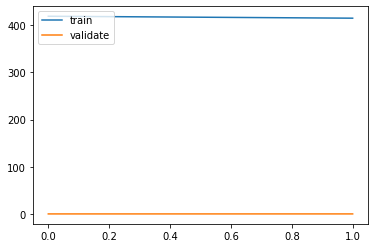

2019-08-16 17:10:48,496 INFO: 161 batches, avg len: 18.7
2019-08-16 17:11:57,500 INFO: Finished 1000 sentences.
2019-08-16 17:12:58,248 INFO: Finished 2000 sentences.
2019-08-16 17:13:56,347 INFO: Finished 3000 sentences.
2019-08-16 17:15:18,839 INFO: Finished 4000 sentences.
2019-08-16 17:16:38,394 INFO: Finished 5000 sentences.
2019-08-16 17:17:34,800 INFO: Finished 6000 sentences.
2019-08-16 17:18:33,379 INFO: Finished 7000 sentences.
2019-08-16 17:19:53,773 INFO: Finished 8000 sentences.
2019-08-16 17:20:51,563 INFO: Finished 9000 sentences.
2019-08-16 17:21:48,804 INFO: Finished 10000 sentences.


[[   5  536 6273]
 [   0  991 2141]
 [   0   47  251]]


2019-08-16 17:22:15,846 INFO: 40 batches, avg len: 18.9
2019-08-16 17:23:23,412 INFO: Finished 1000 sentences.
2019-08-16 17:24:33,439 INFO: Finished 2000 sentences.


[[   0  150 1548]
 [   0  252  538]
 [   0   11   61]]


In [3]:

elmo = load_model('original')
sentiment = SentimentAnalysis(elmo,lr=1e-4)
sentences = sentiment_data['train']['sentences']
labels = sentiment_data['train']['labels']

tokens_train,tokens_test, labels_train,labels_test = train_test_split(sentences, labels, test_size=0.2, random_state=1)

train_set = {'sentences':tokens_train,'labels':labels_train}
validate_set = {'sentences':tokens_test,'labels':labels_test}

sentiment.train(train_set,validate_set,n_epochs=2)

plt.plot(sentiment.loss['train'])
plt.plot(sentiment.loss['validate'])
plt.legend(['train', 'validate'], loc='upper left')
plt.show()

train_preds = sentiment.predict(sentiment_data['train'])
print(confusion_matrix(sentiment_data['train']['labels'],train_preds))
test_preds = sentiment.predict(sentiment_data['test'])
print(confusion_matrix(sentiment_data['test']['labels'],test_preds))